# Summary

* For this analysis the OpenWeatherMap API key was used along with citipy to find the different weather parameters (maximum temperature, humidity, cloudiness and wind speed) of random cities within a latitude and longitude range.


* Scatter plot and linear regression model was plotted to find the correlation between the latitude of the cities and the different weather parameters.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Empty list to fetch the weather data for each city

city_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    
    record_count += 1
    
    # Parse the JSON and retrieve data
    
    city_weather = requests.get(city_url).json()
    
    # If an error is experienced, skip the city
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country and date
    
    try:
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']    
    
        # Append the City information into city_data list
    
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | totness
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | nishihara
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | karaul
City not found. Skipping...
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | n

Processing Record 39 of Set 4 | hailey
Processing Record 40 of Set 4 | katsina
Processing Record 41 of Set 4 | manduria
Processing Record 42 of Set 4 | orchard homes
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | price
Processing Record 45 of Set 4 | rondonopolis
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | sainte-marie
Processing Record 49 of Set 4 | saldanha
Processing Record 0 of Set 5 | san patricio
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | port-de-paix
City not found. Skipping...
Processing Record 4 of Set 5 | acarau
Processing Record 5 of Set 5 | nicoya
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | khristoforovo
City not found. Skipping...
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | tuktoyaktuk
Processing Record 10 of Set

Processing Record 26 of Set 8 | saint anthony
Processing Record 27 of Set 8 | bairiki
Processing Record 28 of Set 8 | baracoa
Processing Record 29 of Set 8 | kadnikov
Processing Record 30 of Set 8 | nanakuli
Processing Record 31 of Set 8 | togur
Processing Record 32 of Set 8 | chicama
Processing Record 33 of Set 8 | paamiut
Processing Record 34 of Set 8 | reyes
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | tera
Processing Record 37 of Set 8 | santa rosa
Processing Record 38 of Set 8 | sinnamary
Processing Record 39 of Set 8 | kosmynino
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | tiarei
Processing Record 42 of Set 8 | umirim
Processing Record 43 of Set 8 | tomatlan
Processing Record 44 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 45 of Set 8 | asadabad
Processing Record 46 of Set 8 | pangkalanbuun
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | arona
Processing Record 49 of Set 8 | norwi

Processing Record 12 of Set 12 | kumluca
Processing Record 13 of Set 12 | zhicheng
Processing Record 14 of Set 12 | lhokseumawe
Processing Record 15 of Set 12 | curillo
Processing Record 16 of Set 12 | olinda
Processing Record 17 of Set 12 | kracheh
City not found. Skipping...
Processing Record 18 of Set 12 | teguldet
Processing Record 19 of Set 12 | yokadouma
Processing Record 20 of Set 12 | vilyuysk
Processing Record 21 of Set 12 | tabas
Processing Record 22 of Set 12 | darya khan
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | aginskoye
Processing Record 25 of Set 12 | bababe
City not found. Skipping...
Processing Record 26 of Set 12 | kaduna
Processing Record 27 of Set 12 | inirida
Processing Record 28 of Set 12 | athabasca
Processing Record 29 of Set 12 | mezen
Processing Record 30 of Set 12 | pitimbu
Processing Record 31 of Set 12 | hihifo
City not found. Skipping...
Processing Record 32 of Set 12 | coahuayana
Processing Recor

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data, columns = ['City', 'Lat', 'Lng', 'Max Temp', 
                                                  'Humidity', 'Cloudiness', 'Wind Speed', 
                                                  'Country', 'Date'])

city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,17.94,48,88,2.73,NZ,1673049226
1,barrow,71.2906,-156.7887,-19.99,77,100,9.77,US,1673049227
2,hermanus,-34.4187,19.2345,13.78,75,0,4.88,ZA,1673048997
3,mount gambier,-37.8333,140.7667,27.95,24,0,3.42,AU,1673049054
4,klaksvik,62.2266,-6.5890,-0.49,62,90,2.97,FO,1673049227


In [7]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,17.94,48,88,2.73,NZ,1673049226
1,barrow,71.2906,-156.7887,-19.99,77,100,9.77,US,1673049227
2,hermanus,-34.4187,19.2345,13.78,75,0,4.88,ZA,1673048997
3,mount gambier,-37.8333,140.7667,27.95,24,0,3.42,AU,1673049054
4,klaksvik,62.2266,-6.5890,-0.49,62,90,2.97,FO,1673049227


# Latitude Vs. Temperature

In [9]:
today = pd.to_datetime('now').strftime("%m/%d/%Y")

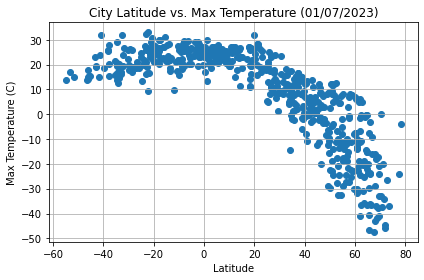

In [10]:
# Scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values,y_values)

plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot

plt.show()

# Latitude Vs. Humidity

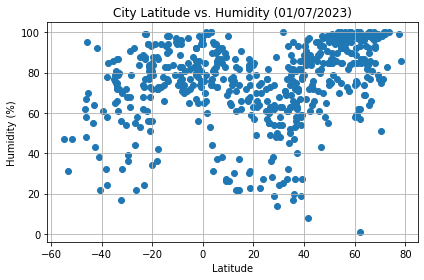

In [11]:
# Scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values)

plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot

plt.show()

# Latitude Vs. Cloudiness

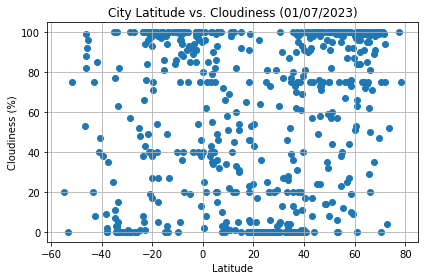

In [12]:
# Scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot

plt.show()

# Latitude Vs. Wind Speed

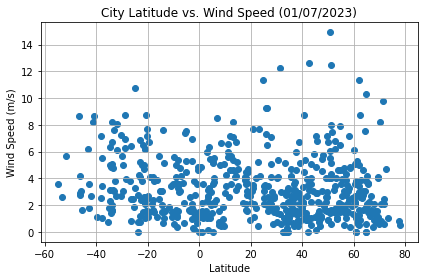

In [13]:
# Scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.tight_layout()

# Save the figure

plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot

plt.show()

# Linear Regression for Each Relationship

In [14]:
# DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df =city_data_df[city_data_df['Lat'] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,barrow,71.2906,-156.7887,-19.99,77,100,9.77,US,1673049227
4,klaksvik,62.2266,-6.5890,-0.49,62,90,2.97,FO,1673049227
6,totness,5.8833,-56.3167,25.14,87,100,5.50,SR,1673049228
7,pevek,69.7008,170.3133,-33.07,98,99,0.55,RU,1673049229
8,ostrovnoy,68.0531,39.5131,-15.94,93,91,1.42,RU,1673049229


In [15]:
# DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,17.94,48,88,2.73,NZ,1673049226
2,hermanus,-34.4187,19.2345,13.78,75,0,4.88,ZA,1673048997
3,mount gambier,-37.8333,140.7667,27.95,24,0,3.42,AU,1673049054
5,puerto ayora,-0.7393,-90.3518,23.64,94,38,1.34,EC,1673049228
9,rikitea,-23.1203,-134.9692,25.97,73,5,5.19,PF,1673049230


# Latitude Vs. Temperature - Northern Hemisphere

The line eqn is: y = -0.78x + 33.44
The r-value is: 0.7181939202365291


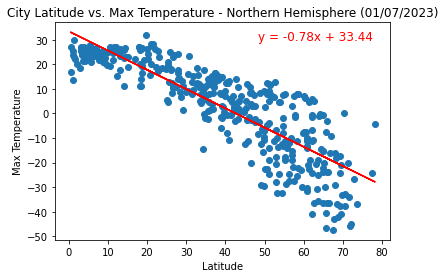

In [16]:
# Define a function to create Linear Regression plots

x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)

# Get regression values

regress_values_north = x_values_north * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north,regress_values_north,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Max Temperature - Northern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.annotate(line_eq, ((max(x_values_north) - 30), (max(y_values_north) - 2)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Max Temperature - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Temperature - Southern Hemisphere

The line eqn is: y = 0.16x + 25.96
The r-value is: 0.19377531274268617


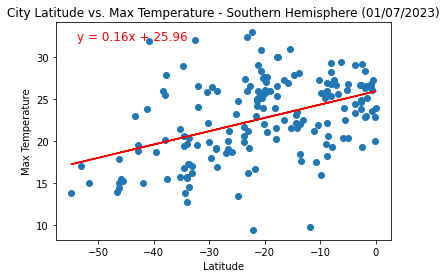

In [17]:
# Define a function to create Linear Regression plots

x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

# Get regression values

regress_values_south = x_values_south * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south,regress_values_south,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Max Temperature - Southern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.annotate(line_eq,((min(x_values_south) + 1), (max(y_values_south) - 1)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Max Temperature - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Temperature

* Northern Hemisphere

    The linear regression model shows a negative correlation which indicates that as the cities latitude moves away from the equator, the maximum temperature decreases and gets colder.
    
    
* Southern Hemisphere

    The linear regression model shows a positive correlation which indicates that as the cities latitude moves towards the equator, the maximum temperature increases and gets hotter.

# Latitude Vs. Humidity - Northern Hemisphere

The line eqn is: y = 0.37x + 61.69
The r-value is: 0.1339738079776548


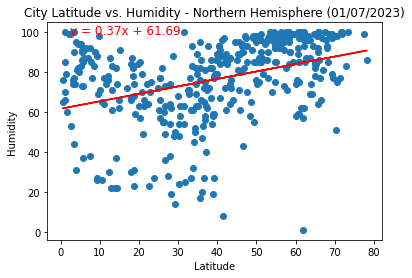

In [18]:
# Define a function to create Linear Regression plots

x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)

# Get regression values

regress_values_north = x_values_north * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north,regress_values_north,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Humidity - Northern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(line_eq,((min(x_values_north) + 2), (max(y_values_north) - 1)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Humidity - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Humidity - Southern Hemisphere

The line eqn is: y = 0.62x + 86.42
The r-value is: 0.20651456517521077


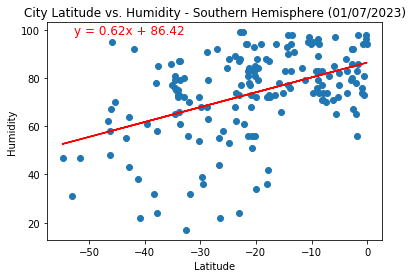

In [19]:
# Define a function to create Linear Regression plots

x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

# Get regression values

regress_values_south = x_values_south * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south,regress_values_south,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Humidity - Southern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(line_eq, ((min(x_values_south) + 2), (max(y_values_south) - 1)), fontsize = 12, color = "red")

# Print the line equation and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Humidity - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Humidity

* Northern Hemisphere

    No correlation is established between Latitude and Humidity. It can be observed that most of the points are scattered around 100% humidity when moving away from the equator.
    
    
* Southern Hemisphere

    No correlation is established between Latitude and Humidity. It can be observed that most of the points are scattered around 100% humidity when moving towards the equator.

# Latitude Vs. Cloudiness - Northern Hemisphere

The line eqn is: y = 0.74x + 29.44
The r-value is: 0.1500169921504041


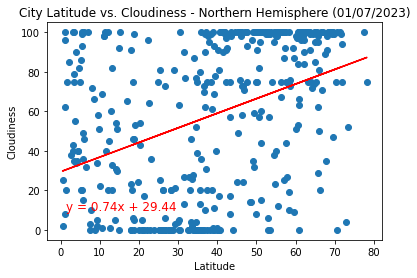

In [20]:
# Define a function to create Linear Regression plots

x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)

# Get regression values

regress_values_north = x_values_north * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north,regress_values_north,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Cloudiness - Northern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(line_eq, ((min(x_values_north) + 1), (min(y_values_north) + 10)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Cloudiness - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Cloudiness - Southern Hemisphere

The line eqn is: y = 1.17x + 81.31
The r-value is: 0.15103415499289027


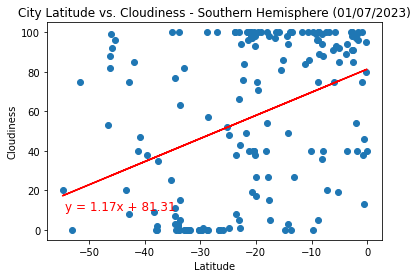

In [21]:
# Define a function to create Linear Regression plots

x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

# Get regression values

regress_values_south = x_values_south * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south,regress_values_south,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Cloudiness - Southern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(line_eq, ((min(x_values_south) + 0.5), (min(y_values_south) + 10)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Cloudiness - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Cloudiness

* Northern Hemisphere

    No correlation is established between Latitude and Cloudiness. It can be observed that there are times with 100% and 0% cloudiness.
    
    
* Southern Hemisphere

    No correlation is established between Latitude and Cloudiness. It can be observed that more points are scattered at 100% cloudiness.

# Latitude Vs. Wind Speed - Northern Hemisphere

The line eqn is: y = -0.01x + 3.38
The r-value is: 0.004207043657720234


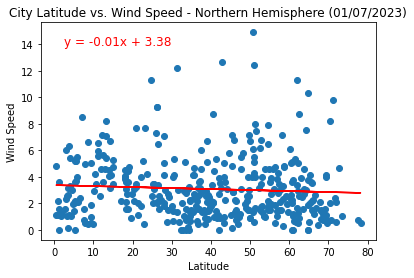

In [22]:
# Define a function to create Linear Regression plots

x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)

# Get regression values

regress_values_north = x_values_north * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north,regress_values_north,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Wind Speed - Northern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate(line_eq, ((min(x_values_north) + 2), (max(y_values_north) - 1)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Wind Speed - Northern Hemisphere.png")

# Show plot

plt.show()

# Latitude Vs. Wind Speed - Southern Hemisphere

The line eqn is: y = -0.04x + 2.54
The r-value is: 0.06633921861347288


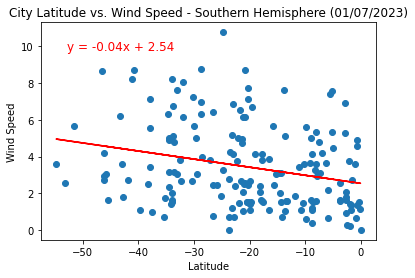

In [23]:
# Define a function to create Linear Regression plots

x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

# Get regression values

regress_values_south = x_values_south * slope + intercept

# Get the line equation

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south,regress_values_south,"r-")

# Label plot and annotate the line equation

plt.title(f"City Latitude vs. Wind Speed - Southern Hemisphere ({today})")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.annotate(line_eq, ((min(x_values_south) + 2), (max(y_values_south) - 1)), fontsize = 12, color = "red")

# Print the line eqn and r value

print(f"The line eqn is: {line_eq}")

print(f"The r-value is: {rvalue**2}")

# Save the figure

plt.savefig("output_data/City Latitude vs. Wind Speed - Southern Hemisphere.png")

# Show plot

plt.show()

# Discussion about Linear Relationship of Latitude Vs. Wind Speed

* Northern Hemisphere
    
    No correlation is established between Latitude and Wind Speed. It can be observed that the wind speed is around 0 - 5 m/s.
    
    
* Southern Hemisphere
    
    No correlation is established between Latitude and Wind Speed.